# Lab Four: Multi-Layer Perceptron

Ephraim Sun (7324)
Jadon Swearingen (5324)
Adeeb Abdul Taher (7324)

Lab Assignment Four: Multi-Layer Perceptron 
In this lab, you will compare the performance of multi-layer perceptron programmed  via your own various implementations. 

This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output. The results should be reproducible using your report. This lab project is slightly different from other reports in that you will be asked to complete more specific items.

Dataset Selection

For this assignment, you will be using a specific dataset chosen by the instructor.  This is US Census data available on Kaggle, and also downloadable from the following link: https://www.dropbox.com/s/bf7i7qjftk7cmzq/acs2017_census_tract_data.csv?dl=0Links to an external site.

The Kaggle description appears here: https://www.kaggle.com/muonneutrino/us-census-demographic-data/dataLinks to an external site. 

The classification task you will be performing is to predict, for each tract, what the child poverty rate will be. You will need to convert this from regression to four levels of classification by quantizing the variable of interest. 

Grading Rubric

### Load, Split, and Balance (1.5 points total)
[.5 points] 
- (1) Load the data into memory and save it to a pandas data frame. Do not normalize or one-hot encode any of the features until asked to do so later in the rubric. 
- (2) Remove any observations that having missing data. 
- (3) Encode any string data as integers for now. 
- (4) You have the option of keeping the "county" variable or removing it. Be sure to discuss why you decided to keep/remove this variable. 

In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./acs2017_census_tract_data.csv')

df.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [102]:
# part two 
print(df.shape)
df.dropna(inplace=True)
df.shape
#not too many missing

(74001, 37)


(72718, 37)

In [103]:
df.dtypes

TractId               int64
State                object
County               object
TotalPop              int64
Men                   int64
Women                 int64
Hispanic            float64
White               float64
Black               float64
Native              float64
Asian               float64
Pacific             float64
VotingAgeCitizen      int64
Income              float64
IncomeErr           float64
IncomePerCap        float64
IncomePerCapErr     float64
Poverty             float64
ChildPoverty        float64
Professional        float64
Service             float64
Office              float64
Construction        float64
Production          float64
Drive               float64
Carpool             float64
Transit             float64
Walk                float64
OtherTransp         float64
WorkAtHome          float64
MeanCommute         float64
Employed              int64
PrivateWork         float64
PublicWork          float64
SelfEmployed        float64
FamilyWork          

In [104]:
print(len(df.State.unique()))
print(len(df.County.unique()))

52
1954


__TODO__ add explanation for why we drop county instead of state

In [105]:
df.drop('County',axis=1,inplace=True)

In [106]:
df.dtypes

TractId               int64
State                object
TotalPop              int64
Men                   int64
Women                 int64
Hispanic            float64
White               float64
Black               float64
Native              float64
Asian               float64
Pacific             float64
VotingAgeCitizen      int64
Income              float64
IncomeErr           float64
IncomePerCap        float64
IncomePerCapErr     float64
Poverty             float64
ChildPoverty        float64
Professional        float64
Service             float64
Office              float64
Construction        float64
Production          float64
Drive               float64
Carpool             float64
Transit             float64
Walk                float64
OtherTransp         float64
WorkAtHome          float64
MeanCommute         float64
Employed              int64
PrivateWork         float64
PublicWork          float64
SelfEmployed        float64
FamilyWork          float64
Unemployment        

In [107]:
# lets encode them
initial_list = df.State.unique()
codes = {initial_list[i]: i for i in range(len(initial_list))}

df = df.replace(codes)

In [108]:
print('there are',len(df["ChildPoverty"].unique()), 'different ChildPoverty values')
print('we will want',int(len(df)/4), 'ish instances in each class to create somewhat equal quartiles')
def categorise(row):  
    if row['ChildPoverty'] > 0 and row['ChildPoverty'] <= 8:
        return 'fourth_quartile'
    elif row['ChildPoverty'] > 8 and row['ChildPoverty'] <= 19:
        return 'third_quartile'
    elif row['ChildPoverty'] > 19  and row['ChildPoverty'] <= 37:
        return 'second_quartile'
    return 'first_quartile'

df['poverty_quartile'] = df.apply(lambda row: categorise(row), axis=1)

print(df['poverty_quartile'].value_counts())

there are 954 different ChildPoverty values
we will want 18179 ish instances in each class to create somewhat equal quartiles


poverty_quartile
first_quartile     18699
second_quartile    18583
third_quartile     18306
fourth_quartile    17130
Name: count, dtype: int64


In [109]:
y = df['poverty_quartile']
#one hot encode the poverty quartile
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['poverty_quartile', 'ChildPoverty']), y, test_size=0.20, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(58174, 35)
(58174, 4)
(14544, 35)
(14544, 4)


### Pre-processing and Initial Modeling (2.5 points total)
You will be using a two layer perceptron from class for the next few parts of the rubric. There are several versions of the two layer perceptron covered in class, with example code. When selecting an example two layer network from class be sure that you use: 
- (1) vectorized gradient computation, (2) mini-batching, (3) cross entropy loss, and (4) proper Glorot initialization, at a minimum. There is no need to use momentum or learning rate reduction (assuming you choose a sufficiently small learning rate). It is recommended to use sigmoids throughout the network, but not required.

- [.5 points] Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Do not normalize or one-hot encode the data (not yet). Be sure that training converges by graphing the loss function versus the number of epochs. 

- [.5 points] Now (1) normalize the continuous numeric feature data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.  

- [.5 points] Now(1) normalize the continuous numeric feature data AND (2) one hot encode the categorical data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs. 

- [1 points] Compare the performance of the three models you just trained. Are there any meaningful differences in performance? Explain, in your own words, why these models have (or do not have) different performances.  

Use one-hot encoding and normalization on the dataset for the remainder of this lab assignment.



In [110]:
#Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
#Original Author: Sebastian Raschka

import numpy as np
from scipy.special import expit
import sys
import pandas as pd

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
# Start with the following functions:
#    init
#    encode_labels
#    initialize weights
#    sigmoid
#    add bias (vector of ones)
#    objective function (cost and regularizer)
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
# now let's add in the following functions:
#    feedforward
#    fit and predict
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # need to vectorize this computation!
        # See additional code and derivation below!
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(X_data,self.W1,self.W2)
            
            cost = self._cost(A3,Y_enc,self.W1,self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2)

            self.W1 -= self.eta * grad1
            self.W2 -= self.eta * grad2
            

        return self
class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad2 = V2 @ A2.T
        grad1 = V1[1:,:] @ A1.T
        
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka
# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
class TLPVectorizedMiniBatch(TwoLayerPerceptronVectorized):
    def __init__(self, alpha=0.1, decrease_const=0.0, shuffle=True, minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        
        
        
        # but keep other keywords
        super().__init__(**kwds)

    def fit(self, X, y, print_progress=0):
        """ Learn weights from training data."""
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X_data, y_data = X.copy().values, y.copy()
        else:
            X_data, y_data = X.copy(), y.copy()

        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()
        
        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum

        self.cost_ = []
        for k in range(self.epochs):

            # adaptive learning rate
            eta = self.eta**(1+self.decrease_const*k)# decreasing learning rate
            eta = max(eta,self.eta/1000)
            # there are many forms of adaptive learning rates out there!

            if print_progress>0 and (k+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (k+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]

            # use numpy split to split into equal sized batches 
            # num batches== self.minibatches
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2)
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1, W2=self.W2)

                rho_W1, rho_W2 = eta * grad1, eta * grad2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2

            self.cost_.append(mini_cost)
            
        return self



class TLPVectorizedMiniBatchCrossEntropyGlorot(TLPVectorizedMiniBatch):
    """Uses Initialize Weights"""
    

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ + 1))
        W1[:,:1] = 0
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden + 1)) 
        W2[:,:1] = 0
        
        return W1, W2
    
    
    """Cost function that uses cross entropy"""
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        # cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        # L2_term = self._L2_reg(self.l2_C, W1, W2)
        
        eps = 1e-7
        A3 = np.clip(A3, eps, 1 - eps)
        cost = -np.mean(Y_enc * np.log(A3 + eps) + (1 - Y_enc) * np.log(1 - A3 + eps))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad2 = V2 @ A2.T
        grad1 = V1[1:,:] @ A1.T
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2
    

In [111]:
# Function to convert data into format to test accuracy with
def convert_data(y_pred):
  returnMe = pd.DataFrame()
  
  returnMe['first_quartile'] = (y_pred == 0)
  returnMe['second_quartile'] = (y_pred == 1)
  returnMe['third_quartile'] = (y_pred == 2)
  returnMe['fourth_quartile'] = (y_pred == 3)

  return returnMe

Epoch: 2/10

Epoch: 10/10

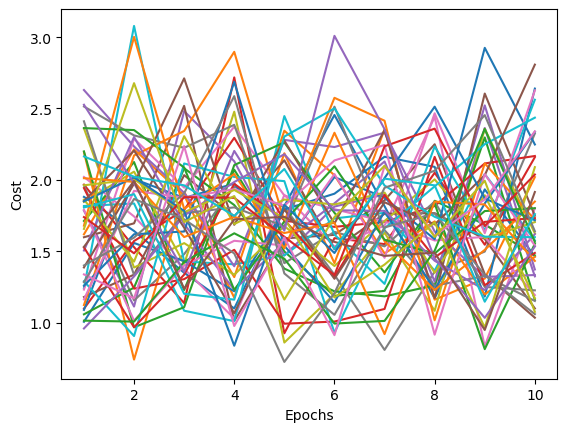

Accuracy: 0.25412541254125415


In [112]:
# train the model
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

params = { 'n_hidden':30, 
         'C':0.1, 'epochs':10, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}
# model = TLPVectorizedMiniBatchCrossEntropyGlorot(n_hidden=30, C=0.0, epochs=50, eta=0.001, random_state=42)
model = TLPVectorizedMiniBatchCrossEntropyGlorot(**params)
model.fit(X_train, y_train, print_progress=True)
# plot the loss over time to ensure convergence
plt.plot(range(1, len(model.cost_)+1), model.cost_)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# evaluate the model on the test set
y_pred = model.predict(X_test)

# convert y_pred into a one-hot encoded dataframe
y_pred = convert_data(y_pred)

# Get accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Epoch: 1/10

Epoch: 10/10

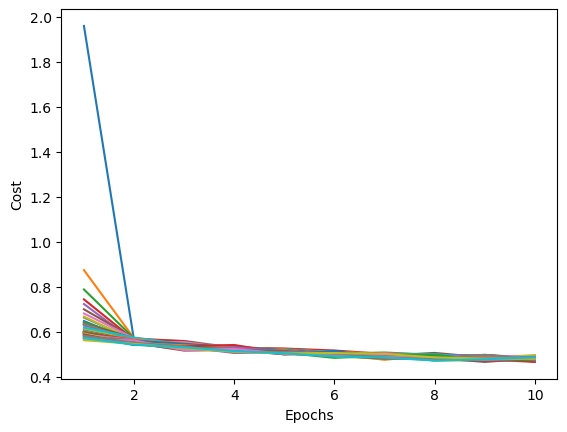

Accuracy: 0.6585533553355336


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# define the TwoLayerPerceptron and TwoLayerPerceptronBase classes here

class NormalizedTwoLayerPerceptron(TLPVectorizedMiniBatchCrossEntropyGlorot):
    def fit(self, X, y, print_progress=False):
        scaler = StandardScaler()
        X_norm = scaler.fit_transform(X)
        super().fit(X_norm, y, print_progress=print_progress)
        self.scaler_ = scaler
        
    def predict(self, X):
        X_norm = self.scaler_.transform(X)
        return super().predict(X_norm)

# train the model
params = { 'n_hidden':30, 
         'C':0.1, 'epochs':10, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}
# model = NormalizedTwoLayerPerceptron(n_hidden=30, C=0.0, epochs=500, eta=0.001, random_state=42)
model = NormalizedTwoLayerPerceptron(**params)
model.fit(X_train, y_train, print_progress=True)

# plot the loss over time to ensure convergence
plt.plot(range(1, len(model.cost_)+1), model.cost_)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# evaluate the model on the test set
y_pred = model.predict(X_test)

# convert y_pred into a one-hot encoded dataframe
y_pred = convert_data(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [114]:
y = df['poverty_quartile']
y = pd.get_dummies(y)

X_categorical = df[['State']]
X = df.drop(['poverty_quartile', 'ChildPoverty', 'State'], axis=1)

# Normalize the numeric feature data
X_norm = StandardScaler().fit_transform(X)

# One-hot encode the categorical features
X_categorical = pd.get_dummies(X_categorical)

# Concatenate the numeric and categorical features
X = np.concatenate((X_norm, X_categorical), axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)


Epoch: 1/100

Epoch: 100/100

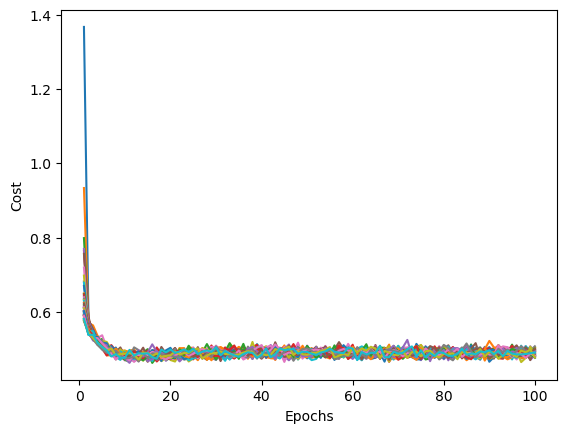

Accuracy: 0.6941694169416942


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# train the model
params = { 'n_hidden':30, 
         'C':0.1, 'epochs':100, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}
# model = NormalizedTwoLayerPerceptron(n_hidden=30, C=0.0, epochs=500, eta=0.001, random_state=42)
model = NormalizedTwoLayerPerceptron(**params)
model.fit(X_train, y_train, print_progress=True)

# plot the loss over time to ensure convergence
plt.plot(range(1, len(model.cost_)+1), model.cost_)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# evaluate the model on the test set
y_pred = model.predict(X_test)

# convert y_pred into a one-hot encoded dataframe
y_pred = convert_data(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


### Comparing performance


#### First Model
- The first model received a score of around 25% accuracy, without the use of any normalization or one-hot encoding on the input data. Thus, there were some columns that are taking on a much larger weight than others. This is why we see such a large difference in accuracy between the first and second model.

#### Second Model
- The second model was able to get a score of about 66% accuracy. This is a huge improvement over the first model. All we did was add a normalization! This is a great example of how important normalization is. The second model is still not as good as the third model, since the second model does not one-hot encode the colunn of county. That is only one column, so the difference in accuracy is not as large as the difference between the first and second model.


#### Third Model
- The third model was able to get a score of about 69% accuracy. The slight improvement is because of the one hot encoding of the county column. This is a great example of how important one-hot encoding is. If there were many more columns that were not one-hot encoded, the difference in accuracy would be much larger.



__TODO__ Compare the three models above, we just finshed one part. Next is three, four, five layer perceptrons and the grad stuff.

In [116]:
class ThreeLayerPerceptron(NormalizedTwoLayerPerceptron):
    
    def __init__(self, alpha=0.1, decrease_const=0.0, shuffle=True, minibatches=1, n_hidden_1=30, n_hidden_2=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):  
        np.random.seed(random_state)
        self.n_hidden_1 = n_hidden_1
        self.n_hidden_2 = n_hidden_2
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        #I just copy pasted all of the init functions so I can see what it is doing better
        

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        #added another block, changed it to use the new number of hidden before finally n_output
        init_bound = 4*np.sqrt(6. / (self.n_hidden_1 + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_1, self.n_features_ + 1))
        W1[:,:1] = 0
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_hidden_2 + self.n_hidden_1 + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_2, self.n_hidden_1 + 1)) 
        W2[:,:1] = 0
        
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden_2 + 1))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden_2 + 1)) 
        W3[:,:1] = 0
        
        return W1, W2, W3

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2))

    def _cost(self, A4, Y_enc, W1, W2, W3):
        '''Get the objective function value'''
        #just need to add W3 to the L2_term for three layer
        eps = 1e-7
        A4 = np.clip(A4, eps, 1 - eps)
        cost = -np.mean(Y_enc * np.log(A4 + eps) + (1 - Y_enc) * np.log(1 - A4 + eps))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3)
        return cost + L2_term
    def _feedforward(self, X, W1, W2, W3):
        """Compute feedforward step"""
        ##just added the Z3 and A4 calculations (copy paste)
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        return A1, Z1, A2, Z2, A3, Z3, A4

    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation. """
        #had to change it to make three gradients
         # vectorized backpropagation
        V3 = (A4 - Y_enc)
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        # V1 = A2 * (1 - A2) * (W2.T @ V2)
        V1 = A2 * (1 - A2) * (W2.T @ V2[1:, :])

        grad3 = V3 @ A3.T
        grad2 = V2[1:, :] @ A2.T
        grad1 = V1[1:, :] @ A1.T

        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C

        return grad1, grad2, grad3

    def predict(self, X):
        """Predict class labels"""
        #added the transform from "normalized" two layer, also added W3
        X_norm = self.scaler_.transform(X)
        _, _, _, _, _, _, A4 = self._feedforward(X_norm, self.W1, self.W2, self.W3)
        y_pred = np.argmax(A4, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        scaler = StandardScaler()
        X_norm = scaler.fit_transform(X)
        self.scaler_ = scaler
        
        
        #I had to just change anything that had a 2 to also have a 3 basically
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X_data, y_data = X.copy().values, y.copy()
        else:
            X_data, y_data = X.copy(), y.copy()

        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_W3_prev = np.zeros(self.W3.shape) # for momentum

        self.cost_ = []
        for k in range(self.epochs):
            
            # adaptive learning rate
            eta = self.eta**(1+self.decrease_const*k)# decreasing learning rate
            eta = max(eta,self.eta/1000)
            # there are many forms of adaptive learning rates out there!
            
            
            if print_progress > 0 and (k + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (k + 1, self.epochs))
                sys.stderr.flush()
                
                
            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]
                
                
            # use numpy split to split into equal sized batches 
            # num batches== self.minibatches
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:
                # feedforward all instances
                A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3)

                cost = self._cost(A4, Y_enc[:,idx], self.W1, self.W2, self.W3)
                mini_cost.append(cost)

                # compute gradient via backpropagation
                grad1, grad2, grad3 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, Z1=Z1, Z2=Z2, Z3=Z3, Y_enc=Y_enc[:,idx],
                                                        W1=self.W1, W2=self.W2, W3=self.W3)
                rho_W1, rho_W2,rho_W3 = eta * grad1, eta * grad2,eta * grad3
                # Save average gradient magnitudes
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev)) # update with momentum
            self.cost_.append(mini_cost)

        return self

Epoch: 2/50

Epoch: 50/50

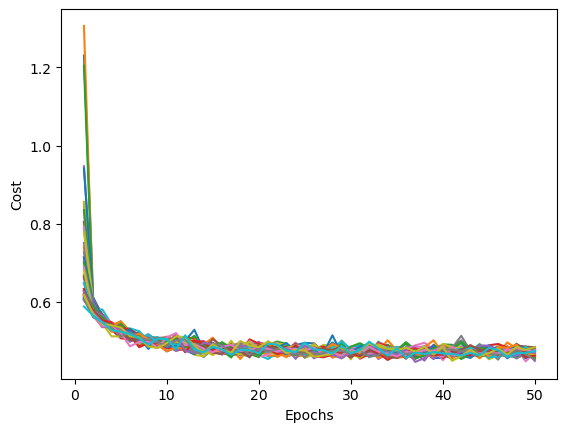

Accuracy: 0.6991199119911992


In [117]:
params = { 'n_hidden_1':30,'n_hidden_2':30, 
         'C':0.1, 'epochs':50, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}
# model = TLPVectorizedMiniBatchCrossEntropyGlorot(n_hidden=30, C=0.0, epochs=50, eta=0.001, random_state=42)
model = ThreeLayerPerceptron(**params)
model.fit(X_train, y_train, print_progress=True)
# plot the loss over time to ensure convergence
plt.plot(range(1, len(model.cost_)+1), model.cost_)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# evaluate the model on the test set
y_pred = model.predict(X_test)

# convert y_pred into a one-hot encoded dataframe
y_pred = convert_data(y_pred)

# Get accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [118]:
class FourLayerPerceptron(ThreeLayerPerceptron):
    
    def __init__(self, alpha=0.1, decrease_const=0.0, shuffle=True, minibatches=1, n_hidden_1=30, n_hidden_2=30,n_hidden_3=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):  
        np.random.seed(random_state)
        self.n_hidden_1 = n_hidden_1
        self.n_hidden_2 = n_hidden_2
        self.n_hidden_3 = n_hidden_3
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        #I just copy pasted all of the init functions so I can see what it is doing better
        

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        #added another block, changed it to use the new number of hidden before finally n_output
        init_bound = 4*np.sqrt(6. / (self.n_hidden_1 + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_1, self.n_features_ + 1))
        W1[:,:1] = 0
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_hidden_2 + self.n_hidden_1 + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_2, self.n_hidden_1 + 1)) 
        W2[:,:1] = 0
        
        init_bound = 4*np.sqrt(6 / (self.n_hidden_3 + self.n_hidden_2 + 1))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_3, self.n_hidden_2 + 1)) 
        W3[:,:1] = 0
        
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden_3 + 1))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden_3 + 1)) 
        W4[:,:1] = 0
        
        return W1, W2, W3, W4

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2))

    def _cost(self, A5, Y_enc, W1, W2, W3, W4):
        '''Get the objective function value'''
        #just need to add W3 to the L2_term for three layer
        eps = 1e-7
        A5 = np.clip(A5, eps, 1 - eps)
        cost = -np.mean(Y_enc * np.log(A5 + eps) + (1 - Y_enc) * np.log(1 - A5 + eps))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4)
        return cost + L2_term
    def _feedforward(self, X, W1, W2, W3, W4):
        """Compute feedforward step"""
        ##just added the Z3 and A4 calculations (copy paste)
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        A4 = self._add_bias_unit(A4, how='row')

        Z4 = W4 @ A4
        A5 = self._sigmoid(Z4)
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5

    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        """ Compute gradient step using backpropagation. """
        #had to change it to make three gradients
         # vectorized backpropagation
        V4 = (A5 - Y_enc)
        V3 = A4 * (1 - A4) * (W4.T @ V4)
        V2 = A3 * (1 - A3) * (W3.T @ V3[1:, :])
        V1 = A2 * (1 - A2) * (W2.T @ V2[1:, :])
        # V1 = A2 * (1 - A2) * (W2.T @ V2)

        grad4 = V4 @ A4.T
        grad3 = V3[1:, :] @ A3.T
        grad2 = V2[1:, :] @ A2.T
        grad1 = V1[1:, :] @ A1.T

        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C
        grad4[:, 1:] += W4[:, 1:] * self.l2_C

        return grad1, grad2, grad3, grad4

    def predict(self, X):
        """Predict class labels"""
        #added the transform from "normalized" two layer, also added W3
        X_norm = self.scaler_.transform(X)
        #A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5
        _, _, _, _, _, _, _, _, A5 = self._feedforward(X_norm, self.W1, self.W2, self.W3, self.W4)
        y_pred = np.argmax(A5, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        scaler = StandardScaler()
        X_norm = scaler.fit_transform(X)
        self.scaler_ = scaler
        
        
        #I had to just change anything that had a 2 to also have a 3 basically
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X_data, y_data = X.copy().values, y.copy()
        else:
            X_data, y_data = X.copy(), y.copy()

        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_W3_prev = np.zeros(self.W3.shape) # for momentum
        rho_W4_prev = np.zeros(self.W4.shape) # for momentum

        self.cost_ = []
        for k in range(self.epochs):
            
            # adaptive learning rate
            eta = self.eta**(1+self.decrease_const*k)# decreasing learning rate
            eta = max(eta,self.eta/1000)
            # there are many forms of adaptive learning rates out there!
            
            
            if print_progress > 0 and (k + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (k + 1, self.epochs))
                sys.stderr.flush()
                
                
            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]
                
                
            # use numpy split to split into equal sized batches 
            # num batches== self.minibatches
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:
                # feedforward all instances
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3, self.W4)

                cost = self._cost(A5, Y_enc[:,idx], self.W1, self.W2, self.W3, self.W4)
                mini_cost.append(cost)

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4,A5=A5, Z1=Z1, Z2=Z2, Z3=Z3,Z4=Z4, Y_enc=Y_enc[:,idx],
                                                        W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4)
                rho_W1, rho_W2,rho_W3,rho_W4 = eta * grad1, eta * grad2,eta * grad3, eta * grad4
                # Save average gradient magnitudes
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev)) # update with momentum
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev)) # update with momentum
            self.cost_.append(mini_cost)

        return self

Epoch: 1/100

Epoch: 100/100

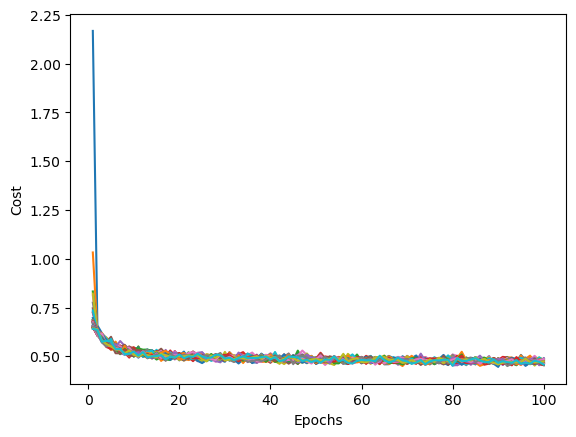

Accuracy: 0.6996012101210121


In [119]:
params = { 'n_hidden_1':30,'n_hidden_2':30, 'n_hidden_3':30,
         'C':0.1, 'epochs':100, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}
# model = TLPVectorizedMiniBatchCrossEntropyGlorot(n_hidden=30, C=0.0, epochs=50, eta=0.001, random_state=42)
model = FourLayerPerceptron(**params)
model.fit(X_train, y_train, print_progress=True)
# plot the loss over time to ensure convergence
plt.plot(range(1, len(model.cost_)+1), model.cost_)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# evaluate the model on the test set
y_pred = model.predict(X_test)

# convert y_pred into a one-hot encoded dataframe
y_pred = convert_data(y_pred)

# Get accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [120]:
class FiveLayerPerceptron(FourLayerPerceptron):
    
    def __init__(self, alpha=0.1, decrease_const=0.0, shuffle=True, minibatches=1, n_hidden_1=30, n_hidden_2=30,n_hidden_3=30,n_hidden_4=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):  
        np.random.seed(random_state)
        self.n_hidden_1 = n_hidden_1
        self.n_hidden_2 = n_hidden_2
        self.n_hidden_3 = n_hidden_3
        self.n_hidden_4 = n_hidden_4
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        #I just copy pasted all of the init functions so I can see what it is doing better
        

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        #added another block, changed it to use the new number of hidden before finally n_output
        init_bound = 4*np.sqrt(6. / (self.n_hidden_1 + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_1, self.n_features_ + 1))
        W1[:,:1] = 0
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_hidden_2 + self.n_hidden_1 + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_2, self.n_hidden_1 + 1)) 
        W2[:,:1] = 0
        
        init_bound = 4*np.sqrt(6 / (self.n_hidden_3 + self.n_hidden_2 + 1))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_3, self.n_hidden_2 + 1)) 
        W3[:,:1] = 0
        
        init_bound = 4*np.sqrt(6 / (self.n_hidden_4 + self.n_hidden_3 + 1))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_4, self.n_hidden_3 + 1)) 
        W4[:,:1] = 0
        
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden_4 + 1))
        W5 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden_4 + 1)) 
        W5[:,:1] = 0
        
        return W1, W2, W3, W4, W5

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2) + np.mean(W5[:, 1:] ** 2))

    def _cost(self, A6, Y_enc, W1, W2, W3, W4, W5):
        '''Get the objective function value'''
        #just need to add W3 to the L2_term for three layer
        eps = 1e-7
        A6 = np.clip(A6, eps, 1 - eps)
        cost = -np.mean(Y_enc * np.log(A6 + eps) + (1 - Y_enc) * np.log(1 - A6 + eps))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term
    def _feedforward(self, X, W1, W2, W3, W4, W5):
        """Compute feedforward step"""
        ##just added the Z3 and A4 calculations (copy paste)
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        A4 = self._add_bias_unit(A4, how='row')
        Z4 = W4 @ A4
        
        A5 = self._sigmoid(Z4)
        A5 = self._add_bias_unit(A5, how='row')
        Z5 = W5 @ A5
        
        A6 = self._sigmoid(Z5)
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6

    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation. """
        #had to change it to make three gradients
         # vectorized backpropagation
        V5 = (A6 - Y_enc)
        V4 = A5 * (1 - A5) * (W5.T @ V5)
        V3 = A4 * (1 - A4) * (W4.T @ V4[1:, :])
        V2 = A3 * (1 - A3) * (W3.T @ V3[1:, :])
        V1 = A2 * (1 - A2) * (W2.T @ V2[1:, :])
        # V1 = A2 * (1 - A2) * (W2.T @ V2)

        grad5 = V5 @ A5.T
        grad4 = V4[1:, :] @ A4.T
        grad3 = V3[1:, :] @ A3.T
        grad2 = V2[1:, :] @ A2.T
        grad1 = V1[1:, :] @ A1.T

        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C
        grad4[:, 1:] += W4[:, 1:] * self.l2_C
        grad5[:, 1:] += W5[:, 1:] * self.l2_C

        return grad1, grad2, grad3, grad4, grad5

    def predict(self, X):
        """Predict class labels"""
        #added the transform from "normalized" two layer, also added W3
        X_norm = self.scaler_.transform(X)
        #A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6
        _, _, _, _, _, _, _, _, _, _,A6 = self._feedforward(X_norm, self.W1, self.W2, self.W3, self.W4, self.W5)
        y_pred = np.argmax(A6, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        scaler = StandardScaler()
        X_norm = scaler.fit_transform(X)
        self.scaler_ = scaler
        
        
        #I had to just change anything that had a 2 to also have a 3 basically
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X_data, y_data = X.copy().values, y.copy()
        else:
            X_data, y_data = X.copy(), y.copy()

        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_W3_prev = np.zeros(self.W3.shape) # for momentum
        rho_W4_prev = np.zeros(self.W4.shape) # for momentum
        rho_W5_prev = np.zeros(self.W5.shape) # for momentum

        self.cost_ = []
        for k in range(self.epochs):
            
            # adaptive learning rate
            eta = self.eta**(1+self.decrease_const*k)# decreasing learning rate
            eta = max(eta,self.eta/1000)
            # there are many forms of adaptive learning rates out there!
            
            
            if print_progress > 0 and (k + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (k + 1, self.epochs))
                sys.stderr.flush()
                
                
            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]
                
                
            # use numpy split to split into equal sized batches 
            # num batches== self.minibatches
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:
                # feedforward all instances
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3, self.W4, self.W5)

                cost = self._cost(A6, Y_enc[:,idx], self.W1, self.W2, self.W3, self.W4, self.W5)
                mini_cost.append(cost)

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4, grad5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4,A5=A5,A6=A6, Z1=Z1, Z2=Z2, Z3=Z3,Z4=Z4,Z5=Z5, Y_enc=Y_enc[:,idx],
                                                        W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4,W5=self.W5)
                rho_W1, rho_W2,rho_W3,rho_W4,rho_W5 = eta * grad1, eta * grad2,eta * grad3, eta * grad4, eta * grad5
                # Save average gradient magnitudes
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev)) # update with momentum
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev)) # update with momentum
                self.W5 -= (rho_W5 + (self.alpha * rho_W5_prev)) # update with momentum
            self.cost_.append(mini_cost)

        return self

Epoch: 1/100

Epoch: 100/100

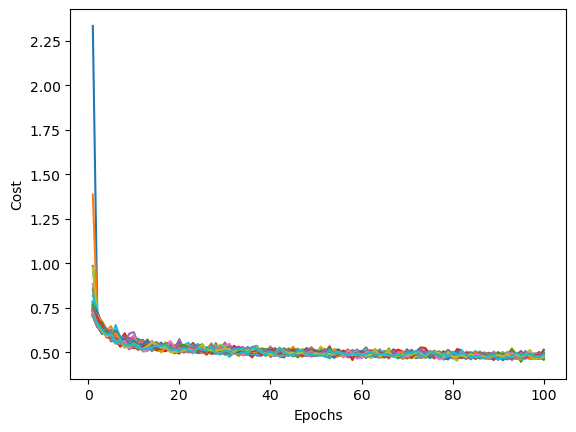

Accuracy: 0.7029015401540154


In [121]:
params = { 'n_hidden_1':30,'n_hidden_2':30, 'n_hidden_3':30,'n_hidden_4':30,
         'C':0.1, 'epochs':100, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}
# model = TLPVectorizedMiniBatchCrossEntropyGlorot(n_hidden=30, C=0.0, epochs=50, eta=0.001, random_state=42)
model = FiveLayerPerceptron(**params)
model.fit(X_train, y_train, print_progress=True)
# plot the loss over time to ensure convergence
plt.plot(range(1, len(model.cost_)+1), model.cost_)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# evaluate the model on the test set
y_pred = model.predict(X_test)

# convert y_pred into a one-hot encoded dataframe
y_pred = convert_data(y_pred)

# Get accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[2 points] Implement an adaptive learning technique that was discussed in lecture and use it on the five layer network (choose either RMSProp or AdaDelta). Discuss which adaptive method you chose. Compare the performance of your five layer model with and without the adaptive learning strategy. Do not use AdaM for the adaptive learning technique as it is part of the exceptional work.

In [135]:
class FiveLayerPerceptronRMSProp(FiveLayerPerceptron):
    def __init__(self, decay_rate=0.9, eps=1e-8, **kwargs):
        super().__init__(**kwargs)
        self.decay_rate = decay_rate
        self.eps = eps
        self.sq_grad1 = 0
        self.sq_grad2 = 0
        self.sq_grad3 = 0
        self.sq_grad4 = 0
        self.sq_grad5 = 0
    
    def _update_weights(self, grad1, grad2, grad3, grad4, grad5):
        # Update the weights using RMSProp
        self.sq_grad1 = self.decay_rate * self.sq_grad1 + (1 - self.decay_rate) * grad1**2
        self.sq_grad2 = self.decay_rate * self.sq_grad2 + (1 - self.decay_rate) * grad2**2
        self.sq_grad3 = self.decay_rate * self.sq_grad3 + (1 - self.decay_rate) * grad3**2
        self.sq_grad4 = self.decay_rate * self.sq_grad4 + (1 - self.decay_rate) * grad4**2
        self.sq_grad5 = self.decay_rate * self.sq_grad5 + (1 - self.decay_rate) * grad5**2

        self.W1 -= (self.eta / np.sqrt(self.sq_grad1 + self.eps)) * grad1
        self.W2 -= (self.eta / np.sqrt(self.sq_grad2 + self.eps)) * grad2
        self.W3 -= (self.eta / np.sqrt(self.sq_grad3 + self.eps)) * grad3
        self.W4 -= (self.eta / np.sqrt(self.sq_grad4 + self.eps)) * grad4
        self.W5 -= (self.eta / np.sqrt(self.sq_grad5 + self.eps)) * grad5
        
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        scaler = StandardScaler()
        X_norm = scaler.fit_transform(X)
        self.scaler_ = scaler
        
        
        #I had to just change anything that had a 2 to also have a 3 basically
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X_data, y_data = X.copy().values, y.copy()
        else:
            X_data, y_data = X.copy(), y.copy()

        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_W3_prev = np.zeros(self.W3.shape) # for momentum
        rho_W4_prev = np.zeros(self.W4.shape) # for momentum
        rho_W5_prev = np.zeros(self.W5.shape) # for momentum

        self.cost_ = []
        for k in range(self.epochs):
            
            # adaptive learning rate
            eta = self.eta**(1+self.decrease_const*k)# decreasing learning rate
            eta = max(eta,self.eta/1000)
            # there are many forms of adaptive learning rates out there!
            
            
            if print_progress > 0 and (k + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (k + 1, self.epochs))
                sys.stderr.flush()
                
                
            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]
                
                
            # use numpy split to split into equal sized batches 
            # num batches== self.minibatches
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:
                # feedforward all instances
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3, self.W4, self.W5)

                cost = self._cost(A6, Y_enc[:,idx], self.W1, self.W2, self.W3, self.W4, self.W5)
                mini_cost.append(cost)

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4, grad5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4,A5=A5,A6=A6, Z1=Z1, Z2=Z2, Z3=Z3,Z4=Z4,Z5=Z5, Y_enc=Y_enc[:,idx],
                                                        W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4,W5=self.W5)
                #no longer using mometum, using RMS Prop instead
                # rho_W1, rho_W2,rho_W3,rho_W4,rho_W5 = eta * grad1, eta * grad2,eta * grad3, eta * grad4, eta * grad5
                # # Save average gradient magnitudes
                # self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                # self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                # self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev)) # update with momentum
                # self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev)) # update with momentum
                # self.W5 -= (rho_W5 + (self.alpha * rho_W5_prev)) # update with momentum
                
                self._update_weights(grad1, grad2, grad3, grad4, grad5)
                
            self.cost_.append(mini_cost)

        return self

Epoch: 1/100

Epoch: 100/100

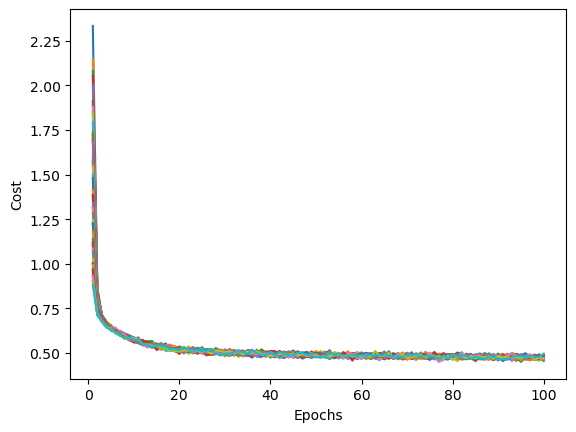

Accuracy: 0.6997387238723872


In [136]:
params = { 'n_hidden_1':30,'n_hidden_2':30, 'n_hidden_3':30,'n_hidden_4':30,
         'C':0.1, 'epochs':100, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}
# model = TLPVectorizedMiniBatchCrossEntropyGlorot(n_hidden=30, C=0.0, epochs=50, eta=0.001, random_state=42)
model = FiveLayerPerceptronRMSProp(**params)
model.fit(X_train, y_train, print_progress=True)
# plot the loss over time to ensure convergence
plt.plot(range(1, len(model.cost_)+1), model.cost_)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# evaluate the model on the test set
y_pred = model.predict(X_test)

# convert y_pred into a one-hot encoded dataframe
y_pred = convert_data(y_pred)

# Get accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
class FiveLayerPerceptronAdam(FiveLayerPerceptron):
    def __init__(self, beta1=0.9, beta2=0.999, eps=1e-8, **kwargs):
        super().__init__(**kwargs)
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.m1 = self.m2 = self.m3 = self.m4 = self.m5 = 0
        self.v1 = self.v2 = self.v3 = self.v4 = self.v5 = 0
        self.t = 0

    def _update_weights(self, grad1, grad2, grad3, grad4, grad5):
        self.t += 1
        self.m1 = self.beta1 * self.m1 + (1 - self.beta1) * grad1
        self.m2 = self.beta1 * self.m2 + (1 - self.beta1) * grad2
        self.m3 = self.beta1 * self.m3 + (1 - self.beta1) * grad3
        self.m4 = self.beta1 * self.m4 + (1 - self.beta1) * grad4
        self.m5 = self.beta1 * self.m5 + (1 - self.beta1) * grad5

        self.v1 = self.beta2 * self.v1 + (1 - self.beta2) * grad1**2
        self.v2 = self.beta2 * self.v2 + (1 - self.beta2) * grad2**2
        self.v3 = self.beta2 * self.v3 + (1 - self.beta2) * grad3**2
        self.v4 = self.beta2 * self.v4 + (1 - self.beta2) * grad4**2
        self.v5 = self.beta2 * self.v5 + (1 - self.beta2) * grad5**2

        m1_corr = self.m1 / (1 - self.beta1**self.t)
        m2_corr = self.m2 / (1 - self.beta1**self.t)
        m3_corr = self.m3 / (1 - self.beta1**self.t)
        m4_corr = self.m4 / (1 - self.beta1**self.t)
        m5_corr = self.m5 / (1 - self.beta1**self.t)

        v1_corr = self.v1 / (1 - self.beta2**self.t)
        v2_corr = self.v2 / (1 - self.beta2**self.t)
        v3_corr = self.v3 / (1 - self.beta2**self.t)
        v4_corr = self.v4 / (1 - self.beta2**self.t)
        v5_corr = self.v5 / (1 - self.beta2**self.t)

        self.W1 -= self.eta / (np.sqrt(v1_corr) + self.eps) * m1_corr
        self.W2 -= self.eta / (np.sqrt(v2_corr) + self.eps) * m2_corr
        self.W3 -= self.eta / (np.sqrt(v3_corr) + self.eps) * m3_corr
        self.W4 -= self.eta / (np.sqrt(v4_corr) + self.eps) * m4_corr
        self.W5 -= self.eta / (np.sqrt(v5_corr) + self.eps) * m5_corr

In [ ]:
params = { 'n_hidden_1':30,'n_hidden_2':30, 'n_hidden_3':30,'n_hidden_4':30,
         'C':0.1, 'epochs':100, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}
# model = TLPVectorizedMiniBatchCrossEntropyGlorot(n_hidden=30, C=0.0, epochs=50, eta=0.001, random_state=42)
model = FiveLayerPerceptronAdam(**params)
model.fit(X_train, y_train, print_progress=True)
# plot the loss over time to ensure convergence
plt.plot(range(1, len(model.cost_)+1), model.cost_)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# evaluate the model on the test set
y_pred = model.predict(X_test)

# convert y_pred into a one-hot encoded dataframe
y_pred = convert_data(y_pred)

# Get accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)